In [1]:
import lorm
from nfft import nfft
import disc.energy_stippling_2d
import numpy as np
import matplotlib.pyplot as plt

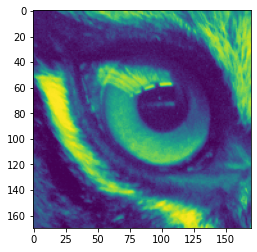

In [4]:
%matplotlib inline
mu = 256-plt.imread('data/eyeofthetiger.jpg')
mu_N_half = int(mu.shape[0]/2)

M = 2*mu_N_half
x = np.linspace(-0.5,0.5,M,endpoint=False)
x1,x2 = np.meshgrid(x,x)
quat_nodes = np.array([x1.ravel()[:],-x2.ravel()[:]]).transpose()
plt.imshow(256-mu.reshape(M,M))

nfft2d = nfft.NFFT2D(M**2,2*mu_N_half,2*mu_N_half)
nfft2d.x = quat_nodes
nfft2d.precompute_x()
nfft2d.f = mu/M**2
nfft2d.adjoint()
mu_hat = np.zeros([2*mu_N_half,2*mu_N_half],dtype=complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[mu_N_half,mu_N_half]

In [49]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
points.coords = np.random.rand(1000,2)-0.5

In [50]:
N_half = 64
N=2*N_half
m = points.coords.shape[0]
energy = disc.energy_stippling_2d.plan(m,N)
if mu_N_half >= N_half:
    energy._mu_hat[:] = mu_hat[mu_N_half-N_half:mu_N_half+N_half,mu_N_half-N_half:mu_N_half+N_half]
else:
    energy._mu_hat[N_half-mu_N_half:N_half+mu_N_half,N_half-mu_N_half:N_half+mu_N_half] = mu_hat[:]

<IPython.core.display.Javascript object>


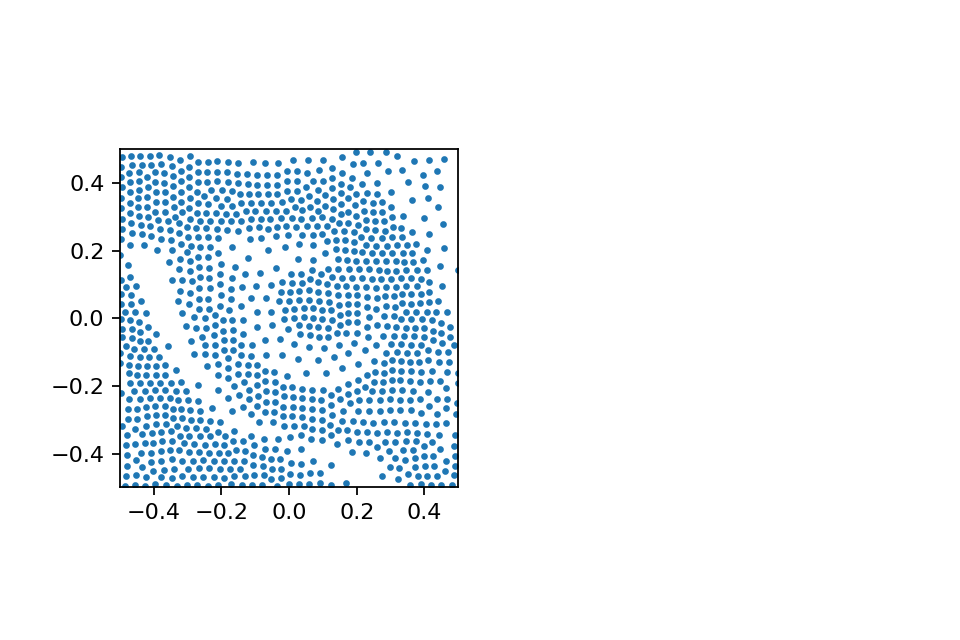

In [51]:
%matplotlib notebook
fig = plt.figure()#dpi=150)
ax = fig.add_subplot(121)
ax.axis(np.array([-.5,.5,-0.5,0.5]))
ax.axes.set_aspect(1)

s, = ax.plot(points.coords[:,0], points.coords[:,1], 'o', markersize=2)
def update_points(p):
    s.set_xdata(np.mod(p.coords[:,0]+0.5,1)-0.5)
    s.set_ydata(np.mod(p.coords[:,1]+0.5,1)-0.5)
    fig.canvas.draw()
    return


In [53]:
method=lorm.optim.ConjugateGradientMethod(max_iter=50,tol_grad=1e-12)
method.listener = update_points
for i in range(3):
    points = method.run(energy,points)
points.coords = np.mod(points.coords+0.5,1)-0.5

Initial value: f[0] = 0.011833898313184262
f[1] = 0.001280473994457108
f[2] = 0.0005157044914242245
f[3] = 0.00032135996800971775
f[4] = 0.00025728988105893995
f[5] = 0.0002309339848189272
f[6] = 0.0002183370932306744
f[7] = 0.00020960778882769061
f[8] = 0.00020451198196784086
f[9] = 0.00020063149262390982
f[10] = 0.00019764524072577887
f[11] = 0.00019535582351449735
f[12] = 0.00019348929408246577
f[13] = 0.00019190939036053966
f[14] = 0.0001905546789368908
f[15] = 0.00018938415766920163
f[16] = 0.00018846061279987708
f[17] = 0.00018764239706502183
f[18] = 0.0001868778482337886
f[19] = 0.00018619216507727843
f[20] = 0.0001855784293327861
f[21] = 0.00018503577488738625
f[22] = 0.00018450111622123
f[23] = 0.00018405514560111924
f[24] = 0.00018363017761992393
f[25] = 0.0001832358360241535
f[26] = 0.00018285923727977363
f[27] = 0.0001825350107008539
f[28] = 0.00018222590603426554
f[29] = 0.00018197143785823443
f[30] = 0.0001817384426914159
f[31] = 0.00018155522186689347
f[32] = 0.000181386